# Perceptron

### What assumption does Perceptron make?

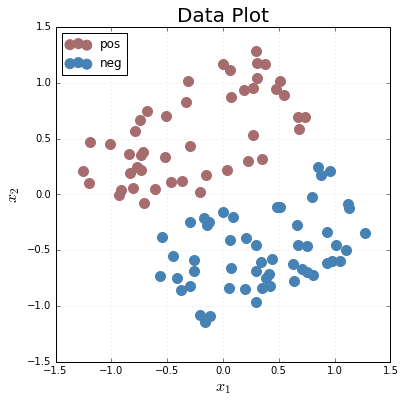

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

X, y = poly_data(100, sep=0.05, rot=np.pi/6)
fig, ax = data_plot(scatter=[(X, y)])

In [3]:
from sklearn.linear_model import Perceptron

perc = Perceptron(n_iter=1, alpha=0.0, shuffle=False)
perc.fit(X, y)

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=1, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=False, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

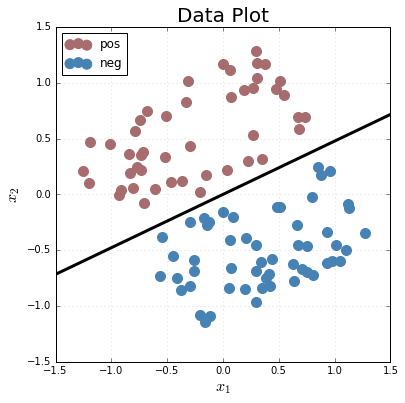

In [4]:
fig, ax = data_plot(scatter=[(X, y)])
xplot = np.linspace(-1.5, 1.5, 20)
w, b = perc.coef_[0], perc.intercept_[0]
yplot = -(b + w[0] * xplot) / w[1] # TODO 
ax.plot(xplot, yplot, lw=3, color="black")

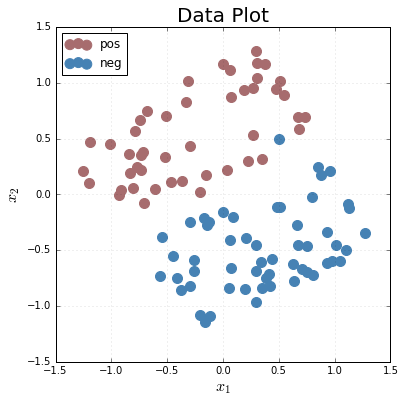

In [5]:
X, y = poly_data(100, sep=0.05, rot=np.pi/6)
X_new = np.concatenate((X, np.array([[0.5,0.5]])))
y_new = np.concatenate((y, np.array([-1])))
fig, ax = data_plot(scatter=[(X_new, y_new)])

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


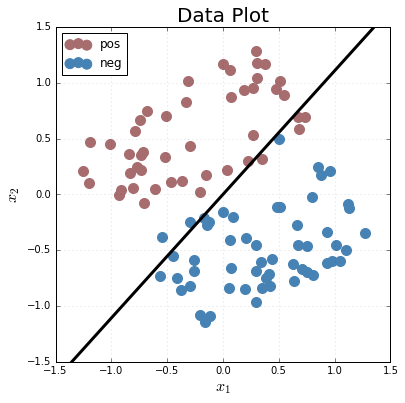

In [6]:
new_perc = Perceptron(n_iter=1, alpha=0.0, shuffle=False)
new_perc.fit(X_new, y_new)
xplot = np.linspace(-1.5,1.5,20)
w, b = new_perc.coef_[0], perc.intercept_[0]
yplot = -(b + w[0]*xplot)/w[1] # TODO 
fig, ax = data_plot(scatter=[(X_new, y_new)])
ax.plot(xplot, yplot, lw=3, color="black");

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


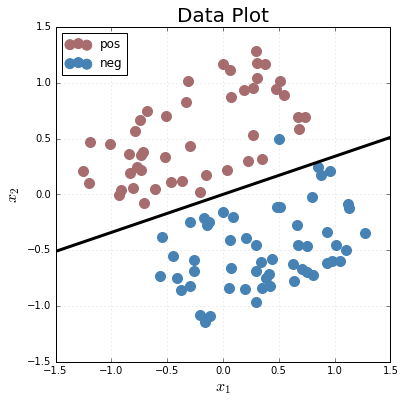

In [7]:
new_perc = Perceptron(n_iter=1, alpha=0.0, shuffle=True)
new_perc.fit(X_new, y_new)
xplot = np.linspace(-1.5,1.5,20)
w, b = new_perc.coef_[0], perc.intercept_[0]
yplot = -(b + w[0]*xplot)/w[1] # TODO 
fig, ax = data_plot(scatter=[(X_new, y_new)])
ax.plot(xplot, yplot, lw=3, color="black");

# Helper Functions

In [8]:
def poly_data(n, mag=0, sep=0, rot=0.0, random_state=1235):
    np.random.seed(random_state)
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    X = np.column_stack((x1, x2))
    y = np.array([1 if mag * (x1i-1) * (x1i+1) * x1i < x2i else -1
                  for x1i, x2i in zip(x1, x2)])
    X[y==1, 1] += sep 
    X[y==-1, 1] -= sep 
    s = np.sin(rot)
    c = np.cos(rot)
    Q = np.array([[c,s], [-s, c]])
    X = np.dot(X, Q)
    shuffle = np.random.choice(range(X.shape[0]), replace=False, size=X.shape[0])
    X, y = X[shuffle, :], y[shuffle]
    return X, y

def data_plot(scatter=[], models=[]):
    '''
    Function to plot the dam data 
    '''
    
    # colors for scatter plots and model plots 
    scolors = ["steelblue", "#a76c6e", "#6a9373", "orange"]
    mcolors = ["black", "gray"]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    
    # Loop over scatter data and make plots 
    for ii, (x, y) in enumerate(scatter):
        pos = x[y==1, :]
        neg = x[y==-1, :]
        ax.scatter(pos[:, 0], pos[:, 1], s=100, color=scolors[1], label="pos", zorder=2)
        ax.scatter(neg[:, 0], neg[:, 1], s=100, color=scolors[0], label="neg", zorder=2)
        
    # Loop over model data and make plots 
    for ii, (xplot, yplot, label) in enumerate(models):
        ax.plot(xplot, yplot, color=mcolors[ii], lw=3, label=label, zorder=1)
        
    # Set axis limits
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
        
    # Label all the things 
    ax.set_xlabel(r"$x_1$", fontsize=16)
    ax.set_ylabel(r"$x_2$", fontsize=16)
    ax.set_title("Data Plot", fontsize=20)
    ax.grid(alpha=0.25)
    ax.legend(loc="upper left", fontsize=12)
    
    return fig, ax 


##### Code adapted from: https://github.com/BoulderDS/CSCI-4622-Machine-Learning-18fa/blob/master/notebooks/Hands_On_KNN_Perceptron.ipynb 